#Parkinsons Disease

### Importing Libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install catboost

     |████████████████████████████████| 67.3MB 53kB/s 


In [ ]:
d=pd.read_csv("parkinsons.data")
x=d.loc[:,d.columns != 'status'].values[:,1:]
y=d.loc[:,'status'].values

In [ ]:
d.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
print(x)

[[119.992 157.302 74.997 ... 0.266482 2.3014419999999998 0.284654]
 [122.4 148.65 113.819 ... 0.33559 2.486855 0.368674]
 [116.682 131.111 111.555 ... 0.311173 2.342259 0.33263400000000004]
 ...
 [174.688 240.005 74.287 ... 0.158453 2.6797720000000003
  0.13172799999999998]
 [198.764 396.961 74.904 ... 0.207454 2.138608 0.123306]
 [214.289 260.277 77.973 ... 0.190667 2.555477 0.148569]]


In [ ]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


In [ ]:
d.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
d.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

### Counting Number of people with the disease and without the disease

In [ ]:
z=0
o=0
zero=[]
one=[]
for i in range (0,len(y)):
  if y[i] == 0:
    zero.append(y[i])
    z=z+1
  else:
    one.append(y[i])
    o=o+1
print("Number of rows with status 0 : ", z)
print("Number of rows with status 1 : ", o)

Number of rows with status 0 :  48
Number of rows with status 1 :  147


### Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x1=scaler.fit_transform(x)
y1=y

### XG Boost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=xg.predict(X_test)

#### Scoring the XG Boost

In [ ]:
from sklearn.metrics import r2_score
r2_xg = r2_score(y_test,y_pred)
print(r2_xg)

0.802675585284281


In [ ]:
from sklearn.metrics import confusion_matrix
cm_xg = confusion_matrix(y_test,y_pred)
print(cm_xg)

[[13  0]
 [ 2 44]]


In [ ]:
from sklearn.metrics import accuracy_score
ac_xg=accuracy_score(y_test,y_pred)
print(ac_xg)

0.9661016949152542


### CatBoost

In [ ]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit(X_train,y_train)

Learning rate set to 0.004395
0:	learn: 0.6883496	total: 53.8ms	remaining: 53.8s
1:	learn: 0.6842092	total: 58ms	remaining: 28.9s
2:	learn: 0.6794597	total: 61.9ms	remaining: 20.6s
3:	learn: 0.6759486	total: 65.8ms	remaining: 16.4s
4:	learn: 0.6724471	total: 69.5ms	remaining: 13.8s
5:	learn: 0.6688168	total: 73.3ms	remaining: 12.1s
6:	learn: 0.6646229	total: 77.7ms	remaining: 11s
7:	learn: 0.6613173	total: 81.4ms	remaining: 10.1s
8:	learn: 0.6576570	total: 84.9ms	remaining: 9.35s
9:	learn: 0.6526615	total: 88.3ms	remaining: 8.74s
10:	learn: 0.6489789	total: 91.9ms	remaining: 8.26s
11:	learn: 0.6457732	total: 95.4ms	remaining: 7.86s
12:	learn: 0.6414525	total: 99.4ms	remaining: 7.55s
13:	learn: 0.6385136	total: 103ms	remaining: 7.25s
14:	learn: 0.6352351	total: 106ms	remaining: 6.98s
15:	learn: 0.6311216	total: 110ms	remaining: 6.74s
16:	learn: 0.6274029	total: 113ms	remaining: 6.53s
17:	learn: 0.6246232	total: 117ms	remaining: 6.36s
18:	learn: 0.6207998	total: 120ms	remaining: 6.2s
19:

In [ ]:
y_pred=cbc.predict(X_test)

#### Scoring the Catboost

In [ ]:
from sklearn.metrics import r2_score
r2_cb=r2_score(y_test,y_pred)
print(r2_cb)

0.9013377926421404


In [ ]:
from sklearn.metrics import confusion_matrix
cm_cb = confusion_matrix(y_test,y_pred)
print(cm_cb)

[[13  0]
 [ 1 45]]


In [ ]:
from sklearn.metrics import accuracy_score
ac_cb = accuracy_score(y_test,y_pred)
print(ac_cb)

0.9830508474576272


### LightGbm

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier ()
lgb.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred =lgb.predict(X_test)

#### Scoring LightGBM

In [ ]:
from sklearn.metrics import r2_score
r2_lgb=r2_score(y_test,y_pred)
print(r2_lgb)

0.6053511705685619


In [ ]:
from sklearn.metrics import confusion_matrix
cm_lgb = confusion_matrix(y_test,y_pred)
print(cm_lgb)

[[13  0]
 [ 4 42]]


In [ ]:
from sklearn.metrics import accuracy_score
ac_lgb = accuracy_score(y_test,y_pred)
print(ac_lgb)

0.9322033898305084


### Comparing the 3 methods

#### r2 scores

In [ ]:
label = ['XG Boost','Cat Boost','LightGBM Boost']
r2 = [r2_xg,r2_cb,r2_lgb]
for i in range(0,len(r2)):
    r2[i]=np.round(r2[i]*100,decimals=3)
print(r2)

[80.268, 90.134, 60.535]


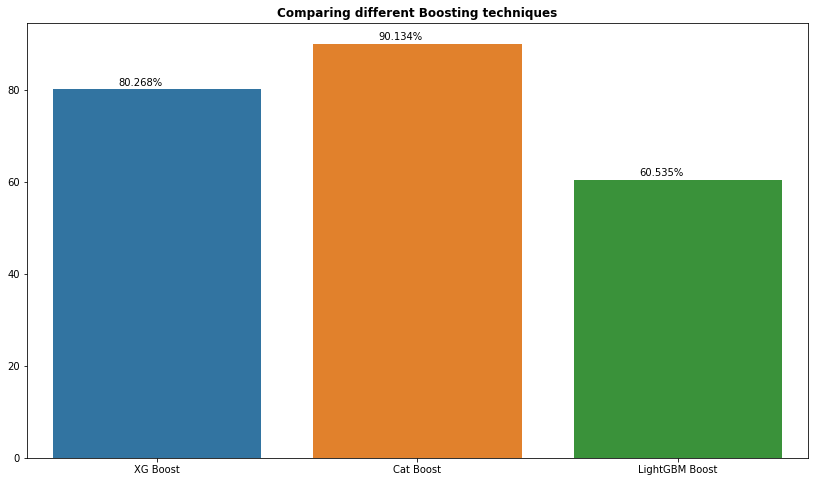

In [ ]:
plt.figure(figsize=(14,8))
p=sns.barplot(y=r2,x=label)
plt.title("Comparing different Boosting techniques",fontweight="bold")
for z in p.patches:
    width, height = z.get_width(), z.get_height()
    x, y = z.get_xy() 
    p.annotate('{:.3f}%'.format(height), (x +0.25, y + height + 0.8))
plt.show()

#### accuracy scores

In [ ]:
ac = [ac_xg,ac_cb,ac_lgb]
for i in range(0,len(ac)):
    ac[i]=np.round(ac[i]*100,decimals=3)
print(ac)

[96.61, 98.305, 93.22]


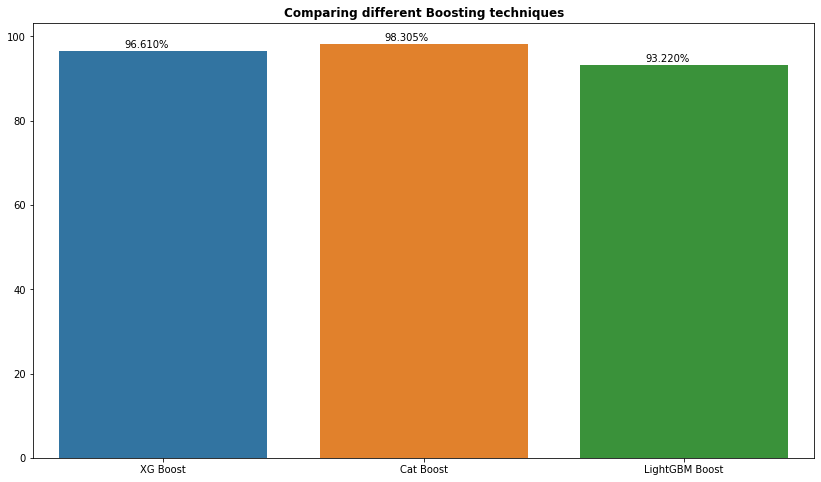

In [ ]:
plt.figure(figsize=(14,8))
p=sns.barplot(y=ac,x=label)
plt.title("Comparing different Boosting techniques",fontweight="bold")
for z in p.patches:
    width, height = z.get_width(), z.get_height()
    x, y = z.get_xy() 
    p.annotate('{:.3f}%'.format(height), (x +0.25, y + height + 0.8))
plt.show()